In [9]:
from PIL import Image
import glob
import tensorflow as tf
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, Input
from keras.utils import np_utils
from keras.layers import Add
from keras.layers import concatenate
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.image as mpimg
%matplotlib inline
import math 
import datetime
import time



# First Thermal model 

image_list = []

def my_load_Train_data_1() :
    image_list = []
    for filename in glob.glob('C:/Users/MANDEEP SINGH SHERRY/Desktop/sensor fusion/thermal sampling/thermal training/*.jpg'): #assuming gif
        im=Image.open(filename)
        img = im.resize((32,32),Image.ANTIALIAS)
        img= tf.keras.preprocessing.image.img_to_array(img)
        img= img.reshape(32, 32, 3)
        img =img.astype('float32')
        img = img / 255.0
        image_list.append(img)

    return image_list

def my_load_Test_data_1() :
    image_list = []
    for filename in glob.glob('C:/Users/MANDEEP SINGH SHERRY/Desktop/sensor fusion/thermal sampling/thermal testing/*.jpg'): #assuming gif
        im=Image.open(filename)
        img = im.resize((32,32),Image.ANTIALIAS)
        img= tf.keras.preprocessing.image.img_to_array(img)
        img= img.reshape(32, 32, 3)
        img =img.astype('float32')
        img = img / 255.0
        image_list.append(img)

    return image_list

X1_train = my_load_Train_data_1()
X1_test = my_load_Test_data_1()
#print(len(X1_test))
y1_train = pd.read_csv('C:/Users/MANDEEP SINGH SHERRY/Desktop/sensor fusion/y_labels.csv')
y1_test = pd.read_csv('C:/Users/MANDEEP SINGH SHERRY/Desktop/sensor fusion/y_test_labels.csv')
y1_test.values.reshape(-1,1)

n_classes = 4
X1_train = np.array(X1_train)
Y1_train = np.array(y1_train)
X1_test = np.array(X1_test)
Y1_test = np.array(y1_test)

Y1_train = np_utils.to_categorical(Y1_train, n_classes)
Y1_test = np_utils.to_categorical(Y1_test, n_classes)
# len(X1_train)
# print(Y1_test)
X1_train.shape
Y1_train.shape

#Secound Camera model

image_list = []

def my_load_Train_data_2() :
    image_list = []
    for filename in glob.glob('C:/Users/MANDEEP SINGH SHERRY/Desktop/sensor fusion/train/training/*.jpg'): #assuming gif
        im=Image.open(filename)
        img = im.resize((32,32),Image.ANTIALIAS)
        img= tf.keras.preprocessing.image.img_to_array(img)
        img= img.reshape(32, 32, 3)
        img =img.astype('float32')
        img = img / 255.0
        image_list.append(img)

    return image_list

def my_load_Test_data_2() :
    image_list = []
    for filename in glob.glob('C:/Users/MANDEEP SINGH SHERRY/Desktop/sensor fusion/test/testing/*.jpg'): #assuming gif
        im=Image.open(filename)
        img = im.resize((32,32),Image.ANTIALIAS)
        img= tf.keras.preprocessing.image.img_to_array(img)
        img= img.reshape(32, 32, 3)
        img =img.astype('float32')
        img = img / 255.0
        image_list.append(img)

    return image_list

X2_train = my_load_Train_data_2()
X2_test = my_load_Test_data_2()
print(len(X2_test))
y2_train = pd.read_csv('C:/Users/MANDEEP SINGH SHERRY/Desktop/sensor fusion/y_labels.csv')
y2_test = pd.read_csv('C:/Users/MANDEEP SINGH SHERRY/Desktop/sensor fusion/y_test_labels.csv')
y2_test.values.reshape(-1,1)

n_classes = 4
X2_train = np.array(X2_train)
Y2_train = np.array(y2_train)
X2_test = np.array(X2_test)
Y2_test = np.array(y2_test)

Y2_train = np_utils.to_categorical(Y2_train, n_classes)
Y2_test = np_utils.to_categorical(Y2_test, n_classes)


# Model 1(Thermal)

inp1 = Input(shape=(32, 32, 3))

# convolutional layer
conv1=Conv2D(100, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(inp1)

# convolutional layer
conv2 =Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(conv1)
pool1=MaxPool2D(pool_size=(2,2))(conv2)
conv3=Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(pool1)
pool2=MaxPool2D(pool_size=(2,2))(conv3)

# flatten output of conv
flat1=Flatten()(pool2)

# hidden layer
hidd1=(Dense(25, activation='relu'))(flat1)
dense1=(Dense(10, activation='relu'))(hidd1)
#output1=Flatten()(dense1)

#output= (Dense(10, activation='relu'))(model_1)

# # Model 2

# # convolutional layer
# inp2 = Input(shape=(32, 32, 3))

# # convolutional layer
# conv1 =Conv2D(100, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(inp2)

# # convolutional layer
# conv2 =Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(conv1)
# pool1=MaxPool2D(pool_size=(2,2))(conv2)
# conv3=Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(pool1)
# pool2=MaxPool2D(pool_size=(2,2))(conv3)

# # flatten output of conv
# flat1=Flatten()(pool2)

# # hidden layer
# hidd1=Dense(25, activation='relu')(flat1)
# dense2=Dense(10, activation='relu')(hidd1)
# output2=Flatten()(dense2)

# for thermal model
dense_thermal=Dense(4,activation='softmax')(dense1)
output_thermal = dense_thermal


# # concatinate two models 

# concat1 = concatenate([output1, output2])
# Out  = Dense(4, activation='softmax')(concat1)

# model_concat = Model(inputs=[inp1, inp2], outputs = Out)

# # compiling the sequential model
# model_concat.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam') 


# # training the model for 10 epochs
# history= model_concat.fit([X1_train,X2_train],Y2_train, batch_size=128,epochs=15,validation_data=([X1_test,X2_test],Y2_test))


# thermal model

model_thermal = Model(inputs= inp1, outputs = output_thermal)
model_thermal.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam') 
history= model_thermal.fit(X1_train,Y1_train, batch_size=128,epochs=15,validation_data=(X1_test,Y1_test))



40
Epoch 1/15
1/1 [==============================] - 0s 270ms/step - loss: 1.3892 - accuracy: 0.3000 - val_loss: 1.3811 - val_accuracy: 0.2500
Epoch 2/15
1/1 [==============================] - 0s 117ms/step - loss: 1.3834 - accuracy: 0.2500 - val_loss: 1.3609 - val_accuracy: 0.3000
Epoch 3/15
1/1 [==============================] - 0s 111ms/step - loss: 1.3616 - accuracy: 0.3250 - val_loss: 1.3342 - val_accuracy: 0.3500
Epoch 4/15
1/1 [==============================] - 0s 104ms/step - loss: 1.3336 - accuracy: 0.3667 - val_loss: 1.2938 - val_accuracy: 0.4000
Epoch 5/15
1/1 [==============================] - 0s 109ms/step - loss: 1.2954 - accuracy: 0.3917 - val_loss: 1.2436 - val_accuracy: 0.4500
Epoch 6/15
1/1 [==============================] - 0s 137ms/step - loss: 1.2511 - accuracy: 0.4500 - val_loss: 1.1946 - val_accuracy: 0.4000
Epoch 7/15
1/1 [==============================] - 0s 115ms/step - loss: 1.2025 - accuracy: 0.3833 - val_loss: 1.1434 - val_accuracy: 0.4750
Epoch 8/15
1/1 [=

In [12]:

#model.save_weights(top_model_weights_path)
start = datetime.datetime.now()
(eval_loss, eval_accuracy) = model_thermal.evaluate(X1_test,Y1_test, batch_size=128, verbose=1)
print('[INFO] Accuracy: {:.2f}%'.format(eval_accuracy * 100)) 
print('[INFO] Loss: {}'.format(eval_loss)) 
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

1/1 [==============================] - 0s 2ms/step - loss: 0.6410 - accuracy: 0.7500
[INFO] Accuracy: 75.00%
[INFO] Loss: 0.6409772038459778
Time:  0:00:00.142424


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


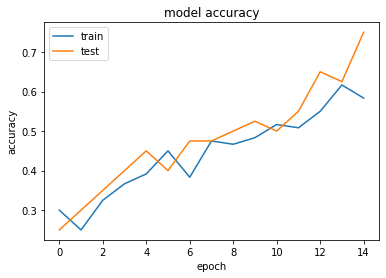

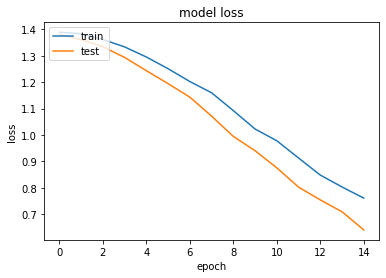

In [14]:
import matplotlib.pyplot as plt

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [20]:
# make a prediction for a new thermal image.

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

# load the image thermal
img1 = load_img('bt9.jpg', target_size=(32, 32))

# convert to array
img1 = img_to_array(img1)

# reshape into a single sample with 3 channels
img1 = img1.reshape(1,32, 32, 3)

# prepare pixel data
img1 = img1.astype('float32')
img1 = img1 / 255.0

# prediction od data
result = model_thermal.predict(img1)
print(result)

[[0.23941642 0.3182084  0.27103692 0.17133825]]


In [21]:
print("probality of Apple")
print(result[0][0]*100)
print("probality of Banana")
print(result[0][1]*100)
print("probality of Laptop")
print(result[0][2]*100)
print("probality of aeroplane")
print(result[0][3]*100)

probality of Apple
23.94164204597473
probality of Banana
31.820839643478394
probality of Laptop
27.103692293167114
probality of aeroplane
17.13382452726364
